In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
airb_file = 'Resources/CleanAirbnbData.csv'
nyhs_file = 'Resources/Housing_New_York_Units_by_Building.csv'


df_airb = pd.read_csv(airb_file)
df_nyhs = pd.read_csv(nyhs_file)
df_nyhs_cl = df_nyhs[df_nyhs['Census Tract'].notnull()]
df_airb.head()

,ID,Name,Host ID,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Calculated Host Listings Count,Availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [47]:
df_nyhs_cl.head()

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,69096,141 METROPOLITAN AVENUE,09/30/2019,NaN,979680.0,141,METROPOLITAN AVENUE,Brooklyn,11249.0,3.023580e+09,...,0,0,0,0,0,0,3,0,3,7
1,69097,3470 FORT INDEPENDENCE STREET,09/30/2019,NaN,989948.0,3469,CANNON PLACE,Bronx,10463.0,2.032580e+09,...,16,3,0,0,0,0,36,0,36,120
8,66137,HP W53 HDFC.HUDMF.FY 19,09/23/2019,09/23/2019,34007.0,328,WEST 53 STREET,Manhattan,10019.0,1.010430e+09,...,21,12,0,0,0,0,41,0,41,41
10,69094,1507 NEW YORK AVENUE,09/19/2019,NaN,989653.0,1507,NEW YORK AVENUE,Brooklyn,11210.0,3.050080e+09,...,0,0,0,0,0,0,3,0,3,8
11,69095,1509 NEW YORK AVENUE,09/19/2019,NaN,984059.0,1509,NEW YORK AVENUE,Brooklyn,11210.0,3.050080e+09,...,0,0,0,0,0,0,3,0,3,8


In [46]:
#number of buildings per borough
df_nyhs_cl['Borough'].value_counts()

Brooklyn         1507
Bronx             781
Manhattan         732
Queens            195
Staten Island      21
Name: Borough, dtype: int64

In [103]:
grp_nyhs_bor = df_nyhs_cl.groupby(['Borough'])
grp_airb_bor = df_airb.groupby(['Neighbourhood Group'])

df_nyhs_bybor = pd.DataFrame({'Building Count':grp_nyhs_bor['Borough'].count(),
                             'BCount Pct': (grp_nyhs_bor['Borough'].count()/df_nyhs_cl['Borough'].count()) * 100,
                              'Unit Count': grp_nyhs_bor['All Counted Units'].sum(),
                              'UCount Pct' : (grp_nyhs_bor['All Counted Units'].sum()/df_nyhs_cl['All Counted Units'].sum()) * 100,
                              'Counted Rental Units': grp_nyhs_bor['Counted Rental Units'].sum(),
                              'CRUnits Pct' : (grp_nyhs_bor['Counted Rental Units'].sum()/df_nyhs_cl['Counted Rental Units'].sum()) * 100,
                               'Home Own Units': grp_nyhs_bor['Counted Homeownership Units'].sum(),
                              'HOUnits Pct' : (grp_nyhs_bor['Counted Homeownership Units'].sum()/df_nyhs_cl['Counted Homeownership Units'].sum()) * 100})
                                


df_airb_bybor = pd.DataFrame({'Listing Count':grp_airb_bor['Neighbourhood Group'].count(),
                             'LCount Pct' : (grp_airb_bor['Neighbourhood Group'].count()/df_airb['Neighbourhood Group'].count()) * 100 })

df_nyhs_bybor

,Building Count,BCount Pct,Unit Count,UCount Pct,Counted Rental Units,CRUnits Pct,Home Own Units,HOUnits Pct
Borough,,,,,,,,
Bronx,781,24.134734,39384,29.769833,35856,33.196926,3528,14.527486
Brooklyn,1507,46.569839,39406,29.786462,33328,30.856402,6078,25.027795
Manhattan,732,22.620519,40570,30.666314,28730,26.599389,11840,48.754375
Queens,195,6.025958,10924,8.257304,8160,7.554856,2764,11.381511
Staten Island,21,0.648949,2011,1.520088,1936,1.792427,75,0.308833


In [102]:
df_airb_bybor

,Listing Count,LCount Pct
Neighbourhood Group,,
Bronx,914,2.914355
Brooklyn,12260,39.091895
Manhattan,13559,43.233850
Queens,4298,13.704483
Staten Island,331,1.055417


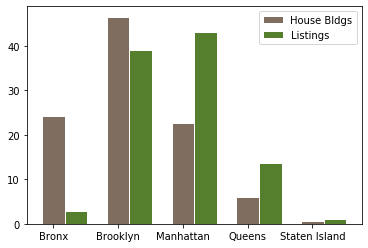

In [97]:
#Show Correlation of House Buildings and Number of AirBnB Listings
import numpy as np
fig, ax =  plt.subplots()

ind = np.arange(5)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, df_nyhs_bybor['BCount Pct'], width, color='#7f6d5f', edgecolor='white', label='House Bldg Pct')
p2 = ax.bar(ind + width, df_airb_bybor['LCount Pct'],width, color='#557f2d', edgecolor='white', label='Listing Pct')

#ax.yaxis.set_units(inch)
ax.autoscale_view()
ax.legend((p1[0], p2[0]), ('House Bldgs', 'Listings'))

ax.set_xticklabels((0,'Bronx','Brooklyn','Manhattan','Queens','Staten Island'))

plt.show()


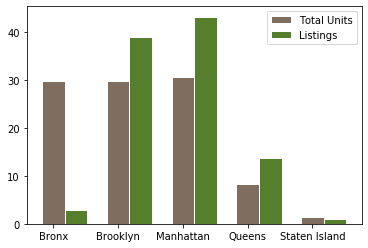

In [105]:
#Show Correlation of Total Units and Number of AirBnB Listings
import numpy as np
fig, ax =  plt.subplots()

ind = np.arange(5)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, df_nyhs_bybor['UCount Pct'], width, color='#7f6d5f', edgecolor='white', label='House Bldg Pct')
p2 = ax.bar(ind + width, df_airb_bybor['LCount Pct'],width, color='#557f2d', edgecolor='white', label='Listing Pct')

#ax.yaxis.set_units(inch)
ax.autoscale_view()
ax.legend((p1[0], p2[0]), ('Total Units', 'Listings'))

ax.set_xticklabels((0,'Bronx','Brooklyn','Manhattan','Queens','Staten Island'))

plt.show()


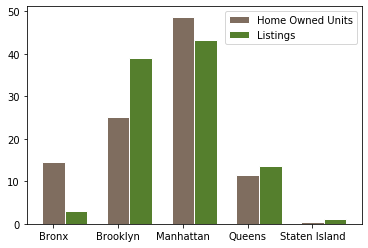

In [108]:
#Show Correlation of Home Owned Units and Number of AirBnB Listings
import numpy as np
fig, ax =  plt.subplots()

ind = np.arange(5)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, df_nyhs_bybor['HOUnits Pct'], width, color='#7f6d5f', edgecolor='white', label='Home Owned Pct')
p2 = ax.bar(ind + width, df_airb_bybor['LCount Pct'],width, color='#557f2d', edgecolor='white', label='Listing Pct')

#ax.yaxis.set_units(inch)
ax.autoscale_view()
ax.legend((p1[0], p2[0]), ('Home Owned Units', 'Listings'))

ax.set_xticklabels((0,'Bronx','Brooklyn','Manhattan','Queens','Staten Island'))

plt.show()

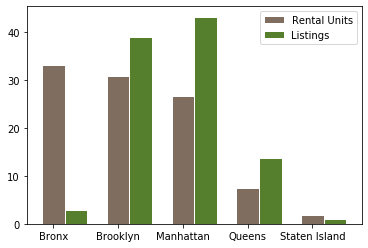

In [107]:
#Show Correlation of Rental Units and Number of AirBnB Listings
import numpy as np
fig, ax =  plt.subplots()

ind = np.arange(5)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, df_nyhs_bybor['CRUnits Pct'], width, color='#7f6d5f', edgecolor='white', label='Rental Units Pct')
p2 = ax.bar(ind + width, df_airb_bybor['LCount Pct'],width, color='#557f2d', edgecolor='white', label='Listing Pct')

#ax.yaxis.set_units(inch)
ax.autoscale_view()
ax.legend((p1[0], p2[0]), ('Rental Units', 'Listings'))

ax.set_xticklabels((0,'Bronx','Brooklyn','Manhattan','Queens','Staten Island'))

plt.show()

<BarContainer object of 5 artists>

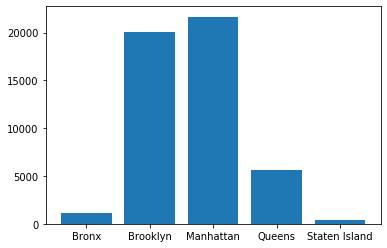

In [11]:
# correlation listing count by neighbourhood group
grpby_nhgrp = df_mn_data.groupby(['neighbourhood_group'])
df_grpby_nhgrp_v_count = pd.DataFrame({'Listing Count':grpby_nhgrp['neighbourhood_group'].count()})

#df_grpby_nhgrp_v_count

plt.bar(df_grpby_nhgrp_v_count.index,df_grpby_nhgrp_v_count['Listing Count'] )

<BarContainer object of 3 artists>

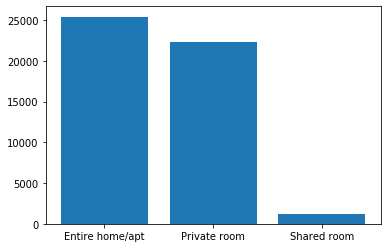

In [12]:
# correlation listing count by room type
grpby_rmtyp = df_mn_data.groupby(['room_type'])
df_grpby_rmtyp_v_count = pd.DataFrame({'Listing Count':grpby_rmtyp['room_type'].count()})

plt.bar(df_grpby_rmtyp_v_count.index,df_grpby_rmtyp_v_count['Listing Count'] )


<BarContainer object of 5 artists>

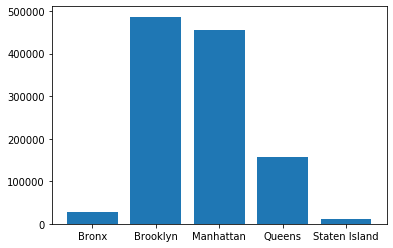

In [13]:
# correlation  number of reviews by neigborhood
grpby_nhgrp = df_mn_data.groupby(['neighbourhood_group'])
df_grpby_nhgrp_v_revcount = pd.DataFrame({'Reviews Count':grpby_nhgrp['number_of_reviews'].sum()})

#df_grpby_nhgrp_v_count

plt.bar(df_grpby_nhgrp_v_revcount.index,df_grpby_nhgrp_v_revcount['Reviews Count'] )

<BarContainer object of 5 artists>

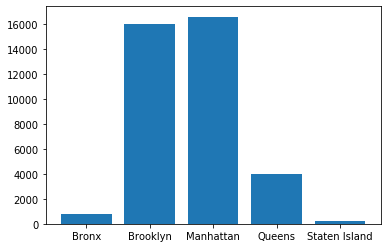

In [14]:
# correlation number of unique hosts by neighbourhood
grpby_nhgrp = df_mn_data.groupby(['neighbourhood_group','host_id'])
df_grpby_nhgrp_v_uhost = pd.DataFrame({'Hosts Count':grpby_nhgrp['host_id'].count()}).reset_index()

grpby_nhgrp_l2 = df_grpby_nhgrp_v_uhost.groupby(['neighbourhood_group'])
df_grpby_nhgrp_v_uhost_l2 = pd.DataFrame({'Unique Host':grpby_nhgrp_l2['host_id'].count()})


plt.bar(df_grpby_nhgrp_v_uhost_l2.index,df_grpby_nhgrp_v_uhost_l2['Unique Host'] )

In [16]:
df = df_mn_data.copy()

In [17]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [18]:
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [20]:
df[df['number_of_reviews'] == 0].count()

id                                10052
name                              10042
host_id                           10052
host_name                         10047
neighbourhood_group               10052
neighbourhood                     10052
latitude                          10052
longitude                         10052
room_type                         10052
price                             10052
minimum_nights                    10052
number_of_reviews                 10052
last_review                           0
reviews_per_month                     0
calculated_host_listings_count    10052
availability_365                  10052
dtype: int64

In [27]:
#get clean data
df_clean = df[df['availability_365'] > 0]

In [28]:
df_clean

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314


In [31]:
BBox = ((df_clean.longitude.min(),   df_clean.longitude.max(), df_clean.latitude.min(), df_clean.latitude.max()))

In [32]:
BBox

(-74.24441999999999, -73.71299, 40.499790000000004, 40.913059999999994)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [6]:
nyc_map = gpd.read_file('Resources/maps/gis_osm_landuse_a_free_1.shp')

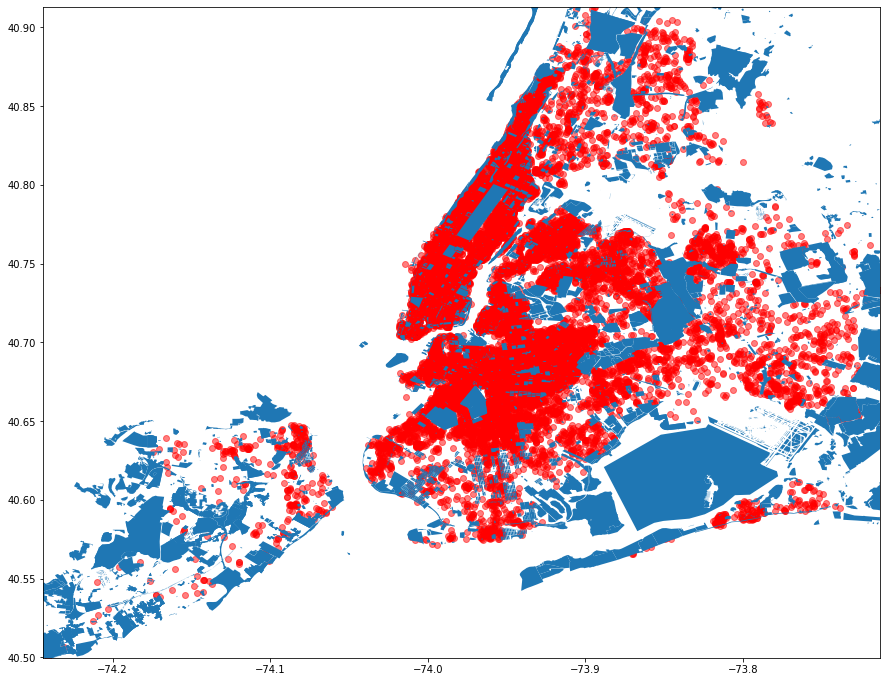

In [22]:
fig, ax = plt.subplots(figsize = (15,15))
ax.set_ylim(40.499790000000004, 40.913059999999994)
ax.set_xlim(-74.24441999999999, -73.71299)

ax.scatter(y=df_airb[["Latitude"]], x=df_airb["Longitude"], alpha=0.5 , c='r')

nyc_map.plot(ax = ax)




<Figure size 432x288 with 0 Axes>